# **Importing Libraries**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
import matplotlib
matplotlib.__version__

'3.3.4'

# **Loading Dataset - MNIST**

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test,axis = 1)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

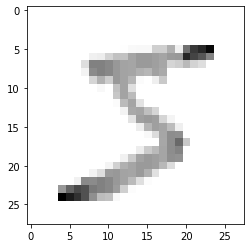

In [ ]:
plt.imshow(X_train[0],cmap = plt.cm.binary)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
y_train.shape
y_test.shape

(10000, 1)

In [ ]:
y = []
for label in y_train:
    k = np.zeros(10)
    k[label] = 1
    y.append(k)    

In [ ]:
y_t = []
for label in y_test:
    k = np.zeros(10)
    k[label] = 1
    y_t.append(k)    

In [ ]:
y = np.array(y)
y_t = np.array(y_t)

In [ ]:
y.shape

(60000, 10)

# **Building Model - CNN**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size = 3, activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = 2,strides= 2),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides= 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])  

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# **Training**

In [ ]:
model.fit(X_train,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 0.2521 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

# **Summary about the model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3277824   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
loss,accuracy = model.evaluate(X_test,y_t)

313/313 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9897


# **Important numbers**

In [ ]:
print("Accuracy : {}".format(accuracy))
print("Loss : {}".format(loss))

Accuracy : 0.9897000193595886
Loss : 0.05173846334218979


# **Saving the model**

In [ ]:
model.save('digits.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("digits.h5") 
loss, accuracy = loaded_model.evaluate(X_test, y_t) 

313/313 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9897
